# Predicting Boston Housing Prices

### Student Name:

#### Kalyan
**********

### Data Set Description
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an 'MDEV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- The features 'RM', 'LSTAT', 'PTRATIO', and 'MDEV' are essential. The remaining non-relevant features have been excluded.
- The feature 'MDEV' has been multiplicatively scaled to account for 35 years of market inflation.



We are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):
- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

### Loading the Data Set

Running the below code imports all the libraries required for the operations which we perform on this dataset and loads the dataset into a dataframe.

In [121]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


> **Note:** In the above piece of code, we divided the entire data into two different parts. One is a feature set and the other is the expected output. We do this because, when we need to train and test our model, we give X,y variables as inputs. Here, X is the feature set and y is the output. So, we separated our data into **prices** and **features**

## Data Exploration and Visualization

It is always a good practice to look at our data before proceeding to work on the data. The below code produces a bar graph of the feature distribution

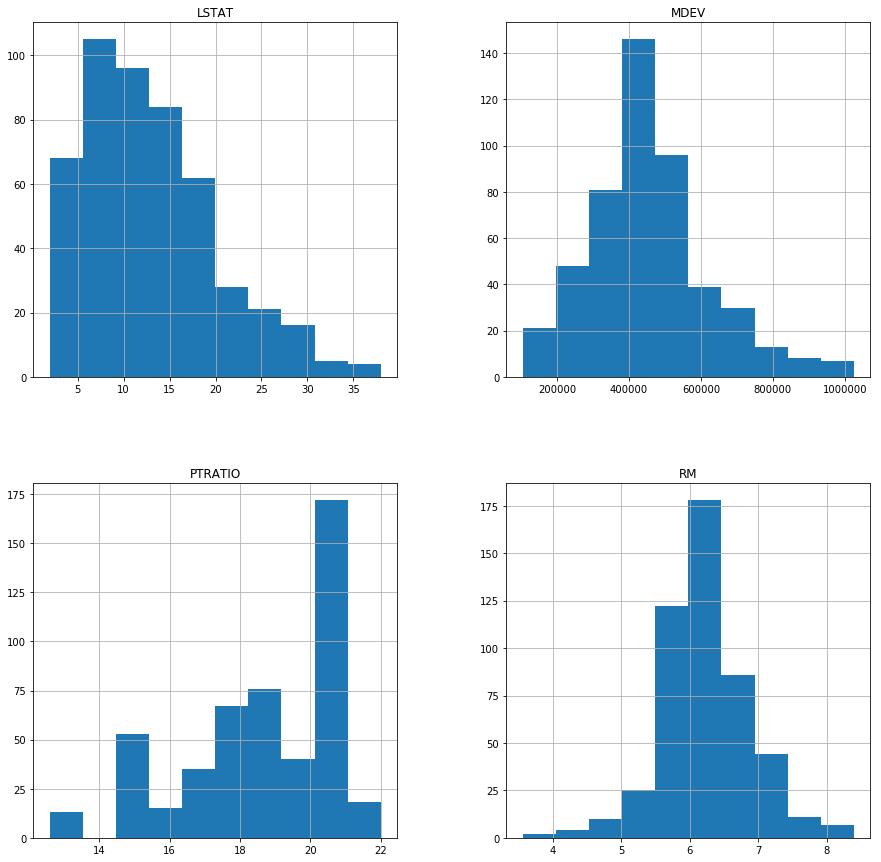

In [122]:
plt.rcParams['figure.figsize'] = (15,15)

data.hist()

plt.show()



In the above plot, we can observe the number of observations for different values of every feature.

For example, the graph of the LSTAT variable shows that the highest number of observations are between the values 5 and 10.  Majority of the observations are in the range of 3 to 20


From the above graphs, we can have a quick look at how our data is distributed. 

In [123]:
# Prints the first five datapoints.

features.head()


,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


### Statistical Description of the Data Set

In order to completely understand the Data given in the dataset, we should explore the statistical information like mean, median, etc... 

Now, let us explore the statistical data for both the features and prices.



#### Statistical information of Features set

In [124]:
# The describe function prints the summary of the data

features.describe()



,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


The above table gives a description of all the features. We can infer the following from the above table about RM.

- **Count:** There are 489 observations in the dataset
- **Mean:** The mean of all observations is 6.240288
- **STD** The standard deviation is 0.643650
- **Min** The minimum value of the observations is 3.561000
- **25%** The first quartile
- **50%** The second quartile
- **75%** The third quartile
- **Max** The max value is 8.398000


>**Note:** In descriptive statistics, the quartiles of a ranked set of data values are the three points that divide the data set into four equal groups, each group comprising a quarter of the data. A quartile is a type of quantile. The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set. The second quartile (Q2) is the median of the data. The third quartile (Q3) is the middle value between the median and the highest value of the data set.


#### Statistical information of Prices

In [125]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation

- An increase in the value of RM would lead to an increase in the value of 'MDEV' as more average number of rooms would result in higher price of the houses.
- An increase in the value of LSTAT would led to an increase in the value of 'MDEV' as homeowners with greater net worth would cause the higher price of the houses.
- An increase in the value of PTRATIO would led to a decrease in the value of 'MDEV' as more number of student to teacher ratio would mean a decrease in the quality of education and thus decrease in the price of houses.

## Developing a Model



### Implementation: Define a Performance Metric

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. In this project, we will calculate the coefficient of determination, R2, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:

- Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.
- Assign the performance score to the score variable.

In [126]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    performance_score=r2_score(y_true, y_predict)
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = performance_score
    # Return the score
    return score

### Goodness of fit

Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [127]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


This model has a coefficient of 0.923 which means that 92.3% of the target can be explained from the features. So, this model succesfully captured the variation of the target variable.

### Shuffle and Splitting the data

The data which we get might be in sorted order which leads to a skewed model. So, we should shuffle the data properly and divide the dataset into training and testing sets. But why should we have a training to testing set ratio of x:y ? Why do we need to test? The model's performance increases as we increase the training set. Even overtraining might also cause the model to uderperform. Testing the data after training helps us in observing whether the predictions are close or not.

In [128]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
X=features
y=prices
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


## Analyzing Model Performance
 
### Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

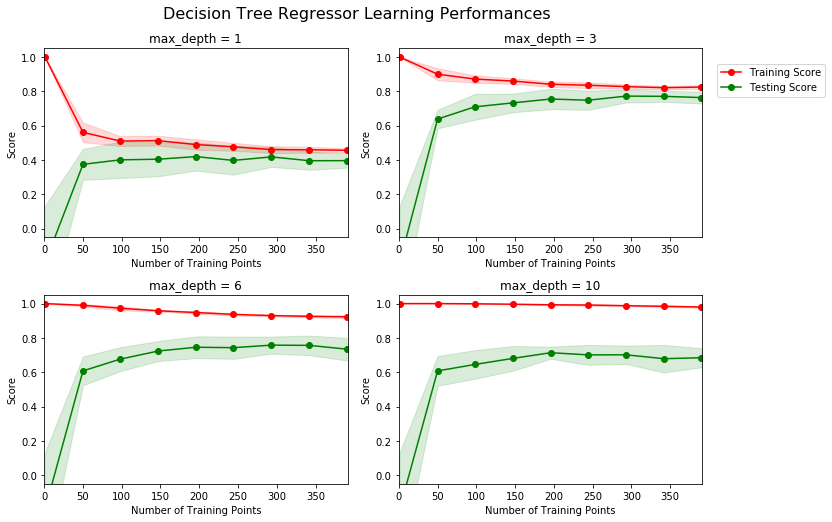

In [129]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

> **Observation:** We can see four graphs in the above picture. If I were to select a graph from among the above images, I will choose the graph with depth 3. The training curve is decreasing with more training points. But the testing curve is increasing gradually which intially had a big inclination. We can also observe the decreasing uncertainity of the curve. As we observe, if we train beyond 350 points, we might overfit the data as the learning curve is getting worse.

### Complexity curves
 

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

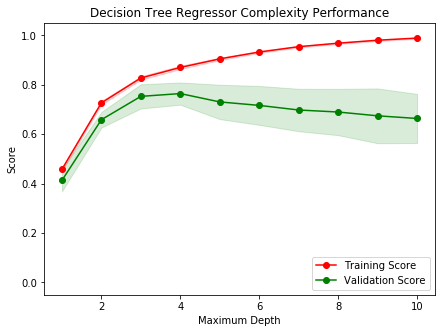

In [130]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
 
The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). The variance is error from sensitivity to small fluctuations in the training set.

When a model is trained with a maximum depth of 1 then it is suffering from high bias.
When the model is trained with a maximum depth of 10 then it is suffering from high variance.
If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well


> From the above graph, we can observe that the suitable max_depth for our model is 4 as it doesn't has either high bias or high variance.

## Evaluating Model Performance
 
In this step, we will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

Here we use two techniques called

- Grid Search
- Cross Validation

#### Grid Search: 
There are usually a lot of parameters that we can tweak to optimize the performance of our model. Grid search lets us specify those parameters that we want to tweak, the ranges that should be explored for each parameter, and the scoring function that we want to optimize. It then iteratively searches the combinations of those parameters and gives us the values of the parameters that optimize the scoring function.
It can be applied to optimize a learning algorithm as a grid search picks out a grid of hyperparameter values, evaluates every one of them, and returns the result.

#### Cross Validation:
Cross-validation is an effective way to separate dataset into trainig and validation sets when building the machine learning model.In this,the data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed.
The advantages of cross validation with grid search is that it reduces the chance of overfitting and also aids in maximizing the data usage in case when dataset size is limited.

### Fitting a model

Now, we implement a model using a decision tree algorithm. Why should we use only this model?  

 
A Decision tree builds regression or classification models in the form of a tree structure. It brakes down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

Our dataset has three features. As we discussed in feature observation section, the data is quite suitable to implement this algorithm.

In [131]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor 
import sklearn
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = sklearn.cross_validation.ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":range(1,10)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable.

In [132]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


#### Predicting Selling Prices

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  

In [133]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
print "\nThe mean of these observations is: ",np.mean(reg.predict(client_data))

Predicted selling price for Client 1's home: $344,400.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36

The mean of these observations is:  504505.029014


As we can observe, the predicted values are within the range of the actual MDEV values. And the mean value of the three observations is close to the overall mean. So, the predicted prices are quite reasonable.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.


In [134]:
vs.PredictTrials(features, prices, fit_model, client_data)


Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $103,732.22


## Applicability

- The data is taken in 1978. There might be some more factors in today's market, that might be less aware at that time. For example, modular kitchens, imported interior decorators, etc..
- The features which are given in the dataset are not sufficient. For example, age of the building, type of building(EX: individual, apartment, etc), size of lot, etc.. might add a great value to our prediction model.
- The model can make consistent predictions based on some sets of dataset but may also produce inconsistent predictions on other datasets.So, there is a variability in the predictions.
- The data collected in urban area is applicable only in a urban area. The same is not applicable in rural areas.




## Conclusion

This model cannot be used in real world due to above stated reasons.